In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

dataset=pd.read_csv("zomato.csv")
dataset.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Date Preprocessing

In [2]:
#removing the missing value
dataset = dataset.loc[dataset.rate !='-']
dataset = dataset[dataset["rate"].notnull()]
dataset.shape
dataset.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            828
location                           0
rest_type                        151
dish_liked                     20264
cuisines                          11
approx_cost(for two people)      248
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [3]:
#removing few rows with invalid class values
dataset= dataset.loc[dataset.rate !='NEW']
dataset.shape

(41665, 17)

In [4]:
#converting cost to float
dataset = dataset.rename({"approx_cost(for two people)": "cost"}, axis=1)
dataset["cost"] = dataset["cost"].replace(",", "", regex = True)
dataset[["cost"]] = dataset[["cost"]].apply(pd.to_numeric)

In [5]:
#imputing the missing few cost values with mean
cost_mean=dataset['cost'].mean()
dataset["cost"].fillna(cost_mean, inplace = True)
cost_mean

603.2680477087257

In [6]:
dataset.rest_type.mode()[0]

'Quick Bites'

In [7]:
#imputing the missing few restaurant type values with mode
dataset["rest_type"].fillna(dataset.rest_type.mode()[0], inplace = True)
dataset.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                   0
votes                  0
phone                814
location               0
rest_type              0
dish_liked         18203
cuisines              11
cost                   0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [8]:
#remove bad characters in the rate column
dataset["rating"] = dataset["rate"].str[:3]
dataset.drop("rate", axis = 1, inplace = True)

In [9]:
dataset.cuisines.mode()

0    North Indian
dtype: object

In [10]:
#imputing the missing few cuisines values with mode
dataset["cuisines"].fillna(dataset.cuisines.mode()[0], inplace = True)
dataset.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
votes                  0
phone                814
location               0
rest_type              0
dish_liked         18203
cuisines               0
cost                   0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
rating                 0
dtype: int64

In [11]:
#removing unwanted columns
del dataset['url']
del dataset['phone']
del dataset['dish_liked']
del dataset['reviews_list']
del dataset['menu_item']
del dataset['listed_in(type)']
del dataset['listed_in(city)']

In [12]:
#make column numeric
dataset["rating"] = pd.to_numeric(dataset["rating"])

In [13]:
#grouping the resturant
temp = dataset.groupby(['name','location','address','online_order','book_table','rest_type','cost','cuisines']).agg({'rating': [np.mean],   'votes':[np.mean]})        

In [14]:
#save the dataset temporarily
temp.to_csv('zomato3.csv')

In [15]:
temp.values.shape

(10387, 2)

In [16]:
#read dataset again as grouped
dataset_grouped=pd.read_csv("zomato3.csv")
dataset_grouped.columns = ['name','location','address','online_order','book_table','rest_type','cost','cuisines','rating','votes']
dataset_grouped = dataset_grouped.iloc[3:]

In [17]:
dataset_grouped.head()

,name,location,address,online_order,book_table,rest_type,cost,cuisines,rating,votes
3,#L-81 Cafe,HSR,"Sector 6, HSR Layout, HSR",Yes,No,Quick Bites,400.0,"Fast Food, Beverages",3.8999999999999995,48.0
4,#refuel,Bannerghatta Road,"7, Ground Floor, RR Commercial Complex, Akshay...",Yes,No,Cafe,400.0,"Cafe, Beverages",3.7000000000000006,37.0
5,1000 B.C,Koramangala 5th Block,"16, 17th A Main, Koramangala 5th Block, Bangalore",Yes,No,Quick Bites,300.0,"Arabian, Sandwich, Rolls, Burger",3.1999999999999997,49.0
6,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,BTM,"688, Thanish Corner, 7th Main, 10th Cross, 2nd...",No,No,Casual Dining,450.0,"Biryani, North Indian",3.7000000000000006,41.0
7,11 to 11 Express Biriyanis,Electronic City,"Near Velankani Bus Stop, Electroniccity Phase ...",Yes,No,Quick Bites,300.0,"Biryani, Kebab",3.5,22.0


## Visualization patterns for important features

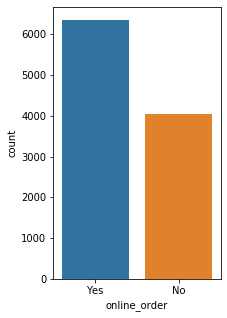

In [18]:
# Bar chart to understand online order's data:
from seaborn import countplot
from matplotlib.pyplot import figure, show
width=10
height=5

width=3
height=5

figure(figsize=(width,height))
countplot(data=dataset_grouped,x="online_order")
show()

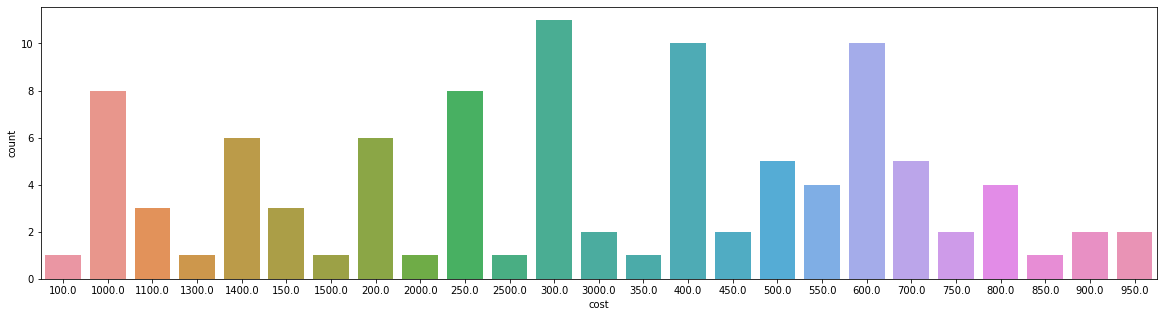

In [19]:
# Bar chart to understand cost's data:
width=20
height=5

figure(figsize=(width,height))
countplot(data=dataset_grouped.head(100),x="cost")
show()

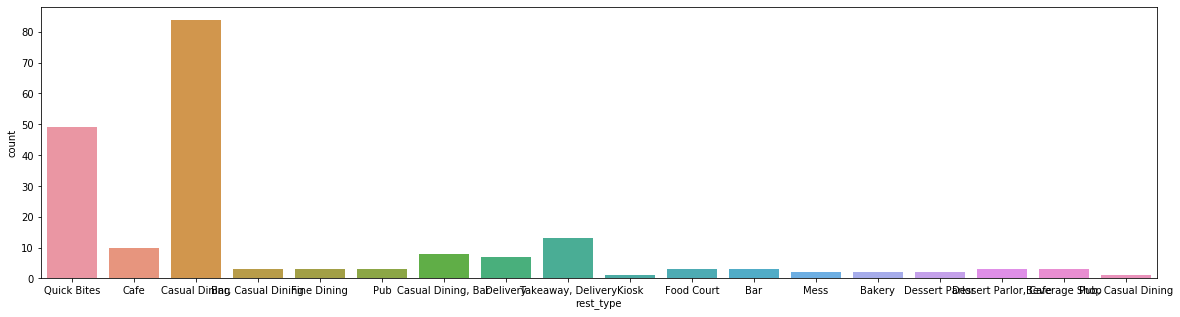

In [20]:
# Bar chart to understand restaurant type's data:
width=20
height=5

figure(figsize=(width,height))
countplot(data=dataset_grouped.head(200),x="rest_type")
show()

In [21]:

dataset_grouped["rating"] = pd.to_numeric(dataset_grouped["rating"])
category = pd.cut(dataset_grouped.rating,bins=[0,2.9,3.9,5],labels=['0','1','2'])
dataset_grouped.insert(5,'new_rate',category)

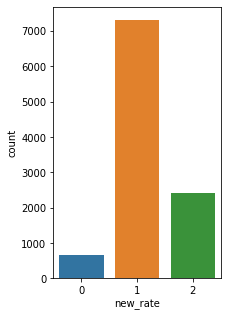

In [22]:
# Bar chart to understand Rate Class's data:
width=3
height=5

figure(figsize=(width,height))
countplot(data=dataset_grouped,x="new_rate")
show()

In [23]:
#convert votes and cost from string to numeric
dataset_grouped["votes"] = pd.to_numeric(dataset_grouped["votes"])
dataset_grouped["cost"] = pd.to_numeric(dataset_grouped["cost"])

In [24]:
dataset_grouped.head()

,name,location,address,online_order,book_table,new_rate,rest_type,cost,cuisines,rating,votes
3,#L-81 Cafe,HSR,"Sector 6, HSR Layout, HSR",Yes,No,1,Quick Bites,400.0,"Fast Food, Beverages",3.9,48.0
4,#refuel,Bannerghatta Road,"7, Ground Floor, RR Commercial Complex, Akshay...",Yes,No,1,Cafe,400.0,"Cafe, Beverages",3.7,37.0
5,1000 B.C,Koramangala 5th Block,"16, 17th A Main, Koramangala 5th Block, Bangalore",Yes,No,1,Quick Bites,300.0,"Arabian, Sandwich, Rolls, Burger",3.2,49.0
6,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,BTM,"688, Thanish Corner, 7th Main, 10th Cross, 2nd...",No,No,1,Casual Dining,450.0,"Biryani, North Indian",3.7,41.0
7,11 to 11 Express Biriyanis,Electronic City,"Near Velankani Bus Stop, Electroniccity Phase ...",Yes,No,1,Quick Bites,300.0,"Biryani, Kebab",3.5,22.0


In [25]:
#Encode numeric columns to work with sklearn library methods

y = dataset_grouped.iloc[:, 5]

filteredDS = dataset_grouped.drop(['rating', 'new_rate'], axis=1)

# label encoding for location

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
filteredDS['location'] = lb_make.fit_transform(filteredDS['location'])
filteredDS['rest_type'] = lb_make.fit_transform(filteredDS['rest_type'])
filteredDS['address'] = lb_make.fit_transform(filteredDS['address'])
filteredDS['name'] = lb_make.fit_transform(filteredDS['name'])
filteredDS['online_order'] = lb_make.fit_transform(filteredDS['online_order'])
filteredDS['book_table'] = lb_make.fit_transform(filteredDS['book_table'])
filteredDS['cuisines'] = lb_make.fit_transform(filteredDS['cuisines'])

print(filteredDS.head())

   name  location  address  online_order  book_table  rest_type   cost  \
3     0        22     8277             1           0         73  400.0   
4     1         3     5460             1           0         16  400.0   
5     2        44     1443             1           0         73  300.0   
6     3         0     5387             0           0         24  450.0   
7     4        19     7718             1           0         73  300.0   

   cuisines  votes  
3      1108   48.0  
4       510   37.0  
5       157   49.0  
6       401   41.0  
7       382   22.0  


# Classification

In [26]:
#combinations to be evaluated by hyperparameter tuning method

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10, 50, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10, 40]
# Minimum number of samples required to split a node
min_samples_split = [3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
            'criterion': criterion}

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(filteredDS.values, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [28]:
#this is our best hyperparameters
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [29]:
# Build a forest and compute the feature importances
classifier = rf_random.best_estimator_

X = filteredDS.values

In [30]:
filteredDS.values.shape

(10386, 9)

## Feature Selection using SFFS

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Floating Selection
sffs = SFS(classifier, 
           k_features=5, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sffs = sffs.fit(X, y)

print('\nSequential Forward Floating Selection (k=5):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)


Sequential Forward Floating Selection (k=5):
(4, 5, 6, 7, 8)
CV Score:
0.8030035176040071


In [32]:
#list columns names for selected features
feat = np.array(sffs.k_feature_idx_)
for f in feat:
    print(filteredDS.columns[f])

book_table
rest_type
cost
cuisines
votes


In [33]:
X = filteredDS.iloc[:, np.array(sffs.k_feature_idx_)]

In [34]:
y.shape

(10386,)

In [35]:
#scale X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Helper Methods

In [37]:
# Model Accuracy, how accurate is the classifier

methods = []
accuracies = []
precisions = []
f1_scores = []
recalls = []

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def showScores(y_test, y_pred, method_name):
    acc = round(metrics.accuracy_score(y_test, y_pred)*100,2)
    precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
    recall = round(recall_score(y_test, y_pred, average='weighted')*100, 2)
    f1score = round(f1_score(y_test, y_pred, average='weighted')*100, 2)
                      
    methods.append(method_name)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)
                
    print("Accuracy:", acc)
    print("Precision:" , precision)
    print("Recall:" , recall)
    print("f1_score:" , f1score)


In [38]:
# apply cross validation then measure the metrices

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, SCORERS
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

cv_methods = []
cv_accuracies = []
cv_precisions = []
cv_recalls = []
cv_f1_scores = []

def crossValidate(classifier, X, y, method):

    cv_methods.append(method)
    
    #def print_accuracy_report(classifier, X, y, num_validations=5):
    accuracy = cross_val_score(classifier, 
            X, y, scoring='accuracy', cv=5)
    
    acc = round(100*accuracy.mean(), 2)
    
    cv_accuracies.append(acc)
    
    print("Accuracy: " + str(acc))

    f1 = cross_val_score(classifier, 
            X, y, scoring='f1_weighted', cv=5)
    print("F1: " + str(round(100*f1.mean(), 2)))

    precision = cross_val_score(classifier, 
            X, y, scoring='precision_weighted', cv=5)
    
    prec = round(100*precision.mean(), 2)
    cv_precisions.append(prec)
    
    print("Precision: " + str(prec))

    recall = cross_val_score(classifier, 
            X, y, scoring='recall_weighted', cv=5)
    print("Recall: " + str(round(100*recall.mean(), 2)))

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 4)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=4,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
showScores(y_test, y_pred, "SVC")

Accuracy: 78.4
Precision: 73.36
Recall: 78.4
f1_score: 74.28


## KNN

In [42]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [44]:
# use hyperparameter tuning for KNN

from sklearn.model_selection import GridSearchCV

grid_params = {
	'n_neighbors' : [3,5,11,19],
	'weights' : ['uniform', 'distance'],
	'metric' : ['euclidean','manhattan']
}

gs = GridSearchCV(
	KNeighborsClassifier(),
	grid_params,
	verbose = 1,
	cv = 3,
	n_jobs = -1
	)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.8s finished


In [45]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')

In [46]:
X.shape

(10386, 5)

In [47]:
# Applying k-Fold Cross Validation
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator = gs_results.best_estimator_, X = X, y = y, cv = 5)
#print("Accuracy:", accuracies.mean()*100)
crossValidate(gs_results.best_estimator_, X, y, "KNN")

Accuracy: 78.16
F1: 75.45
Precision: 73.97
Recall: 78.16


In [48]:
showScores(y_test, y_pred, "KNN")

Accuracy: 78.4
Precision: 75.16
Recall: 78.4
f1_score: 76.14


## Random Forest

In [49]:
# Fitting Random Forest Classification to the Training set
classifier = rf_random.best_estimator_
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [51]:
X.shape[1]

5

In [52]:
crossValidate(classifier, X, y, "Random Forest")

Accuracy: 80.28
F1: 77.04
Precision: 75.47
Recall: 80.42


In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [54]:
showScores(y_test, y_pred, "Random Forest")

Accuracy: 81.25
Precision: 75.84
Recall: 81.25
f1_score: 78.01


## Naive Bayes

In [55]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [57]:
showScores(y_test, y_pred, "Naive Bayes")

Accuracy: 76.74
Precision: 71.11
Recall: 76.74
f1_score: 72.76


## Decision Tree

In [58]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [60]:
showScores(y_test, y_pred, "Decision Tree")

Accuracy: 73.55
Precision: 73.81
Recall: 73.55
f1_score: 73.68


## logistic regression

In [61]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
showScores(y_test, y_pred, "logistic regression")

Accuracy: 77.86
Precision: 72.71
Recall: 77.86
f1_score: 73.61


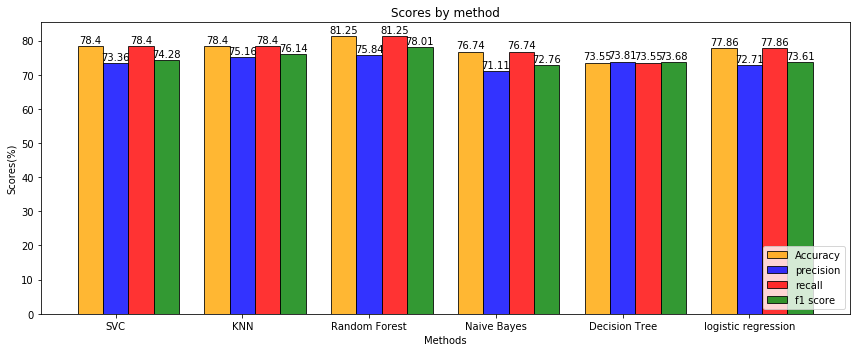

In [64]:
#compare different results

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(len(accuracies)*2, 5))
index = np.arange(len(accuracies))
bar_width = 0.2
opacity = 0.8

bar1 = plt.bar(index, accuracies, bar_width,
alpha=opacity,
color='orange',
edgecolor='black',
label='Accuracy')

bar2 = plt.bar(index + bar_width, precisions, bar_width,
alpha=opacity,
color='blue',
edgecolor='black',
label='precision')

bar3 = plt.bar(index + bar_width*2, recalls, bar_width,
alpha=opacity,
color='red',
edgecolor='black',
label='recall')

bar4 = plt.bar(index + bar_width*3, f1_scores, bar_width,
alpha=opacity,
color='green',
edgecolor='black',
label='f1 score')

plt.xlabel('Methods')
plt.ylabel('Scores(%)')
plt.title('Scores by method')
plt.xticks(index + bar_width, methods)
plt.legend(loc='lower right')

def points_values(values):
    for i in values:
        height = i.get_height()
        ax.annotate(format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                   ha = 'center')


points_values(bar1)
points_values(bar2)
points_values(bar3)
points_values(bar4)

plt.tight_layout()
plt.show()

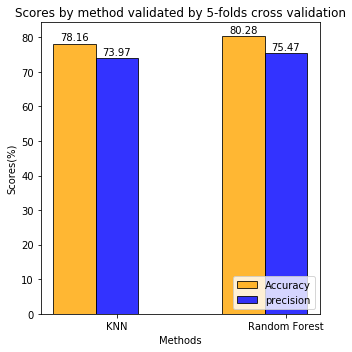

In [65]:
# compare results with using cross validation

fig, ax = plt.subplots(figsize=(5, 5))
index = np.arange(len(cv_accuracies))
bar_width = 0.25
opacity = 0.8

bar1 = plt.bar(index, cv_accuracies, bar_width,
alpha=opacity,
color='orange',
edgecolor='black',
label='Accuracy')

bar2 = plt.bar(index + bar_width, cv_precisions, bar_width,
alpha=opacity,
color='blue',
edgecolor='black',
label='precision')

plt.xlabel('Methods')
plt.ylabel('Scores(%)')
plt.title('Scores by method validated by 5-folds cross validation')
plt.xticks(index + bar_width, cv_methods)
plt.legend(loc='lower right')

points_values(bar1)
points_values(bar2)

plt.tight_layout()
plt.show()

# Clustering

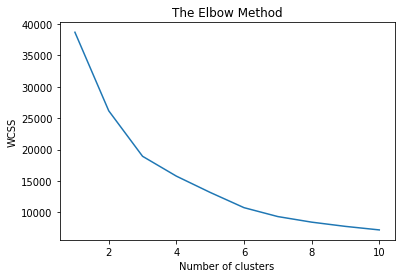

In [66]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

(10386, 5)


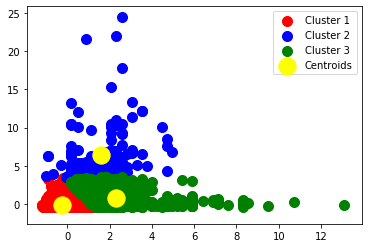

In [67]:
# Fitting K-Means to the dataset
X_cluster = X[:,[2,4]]
print(X.shape)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_cluster)

# Visualising the clusters
plt.scatter(X_cluster[y_kmeans == 0, 0], X_cluster[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_cluster[y_kmeans == 1, 0], X_cluster[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_cluster[y_kmeans == 2, 0], X_cluster[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

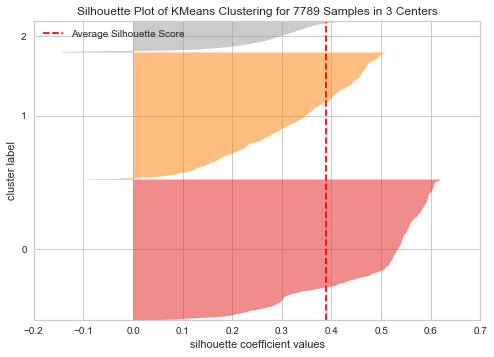

In [68]:
# calculating Silhouette width and visualize it

from yellowbrick.cluster import SilhouetteVisualizer

model = SilhouetteVisualizer(KMeans(3))
model.fit(X_train)
model.show()